# More Expression Analysis With an Updated Gene List

We can start by importing our other notebook for access to functions created previously.

In [1]:
# for reloading libraries and making sure charts and images are displayed
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# importing data analysis libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Functions from the first notebook, cancer_expression_heatmap.ipynb will be referenced as main.

In [3]:
import ipynb.fs.defs.cancer_expression_heatmap as main


# Part 1: Data Organization

We can start by importing our new gene list in:

In [4]:
gene_list = pd.read_csv('datasets/updated_gene_list.csv', delimiter = ',')

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
# filter out the cases we want to exclude
all_rnaseq_file = pd.read_csv('datasets/Sophia_PAAD_RNAseq.csv', delimiter = ',')
count_files = main.create_counts_list()
all_rnaseq = all_rnaseq_file[all_rnaseq_file.columns.difference(count_files)]
all_rnaseq.drop('Unnamed: 0', axis=1, inplace=True)

# move the hgnc_symbol column to first
first_column = all_rnaseq['hgnc_symbol']
all_rnaseq.drop(labels=['hgnc_symbol'], axis=1, inplace=True)
all_rnaseq.insert(0, 'hgnc_symbol', first_column)

In [7]:
rnaseq = all_rnaseq[all_rnaseq['hgnc_symbol'].isin(gene_list["hgnc_symbol"])]

all_rnaseq

hgnc_symbol  X00faf8ba.ff90.4214.9d03.6c5e14645d8f.htseq.counts.gz  \
0            A1BG                                                  0       
1        A1BG-AS1                                                  0       
2            A1CF                                               4988       
3             A2M                                                 26       
4         A2M-AS1                                                  0       
...           ...                                                ...       
37333    ZYG11AP1                                                 27       
37334      ZYG11B                                               1799       
37335         ZYX                                               1543       
37336       ZYXP1                                                  0       
37337       ZZEF1                                                531       

       X0143419f.2abe.4906.bb55.af6010fab05f.htseq.counts.gz  \
0                                                      0       
1                                                      1       
2                                                   3492       
3                                                     83       
4                                                      0       
...                                                  ...       
37333                                                  9       
37334                                               2857       
37335                                               1130       
37336                                                  0       
37337                                                276       

       X01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz  \
0                                                      0       
1                                                      0       
2                                                   3767       
3                                                    113       
4                                                      0       
...                                                  ...       
37333                                                 44       
37334                                               5383       
37335                                               1472       
37336                                                  0       
37337                                                281       

       X03094067.02d4.40c5.b6fa.bb5180dc7eab.htseq.counts.gz  \
0                                                      0       
1                                                      0       
2                                                   2697       
3                                                     45       
4                                                      0       
...                                                  ...       
37333                                                  8       
37334                                               1757       
37335                                                914       
37336                                                  0       
37337                                                 90       

       X0349f526.7816.4a7d.9967.1f75dd9ff00a.htseq.counts.gz  \
0                                                      0       
1                                                      0       
2                                                   4431       
3                                                     65       
4                                                      0       
...                                                  ...       
37333                                                 29       
37334                                               5474       
37335                                                559       
37336                                                  0       
37337                                                 79       

       X03630a0c.



# Part 2: Generating Heatmaps with TPM Conversions

To perform TPM calculations, we will use the PyEnsembl library. Refer to cancer_expression_heatmap.ipynb for assistance running this.

In [8]:
import pyensembl
ensembl = pyensembl.EnsemblRelease()

In [9]:
missing_genes_dict = {'C12orf74':'PLEKHG7',
                     'LINC00856':'LINC00595'}

precalculated_gene_length_dict = {'CCL3L1': 3.090}

In [10]:
# all_rnaseq_tpm = main.calculate_tpm(all_rnaseq, list(all_rnaseq.columns.values))
# nevermind i'm just going to import it from a csv generated in the other notebook

all_rnaseq_tpm = pd.read_csv('datasets/tpm_rnaseq_values.csv', delimiter = ',')
all_rnaseq_tpm.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
rnaseq_tpm = all_rnaseq_tpm[all_rnaseq_tpm['hgnc_symbol'].isin(gene_list["hgnc_symbol"])]

rnaseq_tpm

hgnc_symbol  X00faf8ba.ff90.4214.9d03.6c5e14645d8f.htseq.counts.gz  \
23           AAK1                                           0.438700       
41          ABCA1                                           0.320337       
52          ABCA7                                           1.496345       
116       ABHD17A                                          15.970481       
125       ABHD17B                                           4.100232       
...           ...                                                ...       
36130       WNT5A                                           0.226897       
36200        XKR8                                           4.048793       
36271        YES1                                           0.000878       
36546     ZFYVE16                                           1.545058       
36608      ZMYND8                                           0.441464       

       X0143419f.2abe.4906.bb55.af6010fab05f.htseq.counts.gz  \
23                                              0.150750       
41                                              0.131980       
52                                              3.451926       
116                                             7.310420       
125                                             1.977526       
...                                                  ...       
36130                                           0.012939       
36200                                           4.117047       
36271                                           0.000000       
36546                                           0.437017       
36608                                           0.252982       

       X01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz  \
23                                              0.249352       
41                                              0.158270       
52                                              3.396367       
116                                             9.526289       
125                                             2.457392       
...                                                  ...       
36130                                           0.099530       
36200                                           3.140662       
36271                                           0.000472       
36546                                           0.343794       
36608                                           0.250380       

       X03094067.02d4.40c5.b6fa.bb5180dc7eab.htseq.counts.gz  \
23                                              0.562523       
41                                              0.301564       
52                                              6.471792       
116                                            17.658459       
125                                             3.839023       
...                                                  ...       
36130                                           2.183558       
36200                                          11.736799       
36271                                           0.000000       
36546                                           1.264533       
36608                                           0.499548       

       X0349f526.7816.4a7d.9967.1f75dd9ff00a.htseq.counts.gz  \
23                                              0.273278       
41                                              0.139925       
52                                              1.692421       
116                                             7.947148       
125                                             1.835269       
...                                                  ...       
36130                                           0.760413       
36200                                           4.471699       
36271                                           0.000661       
36546                                           0.703533       
36608                                           0.203542       

       X03630a0c.

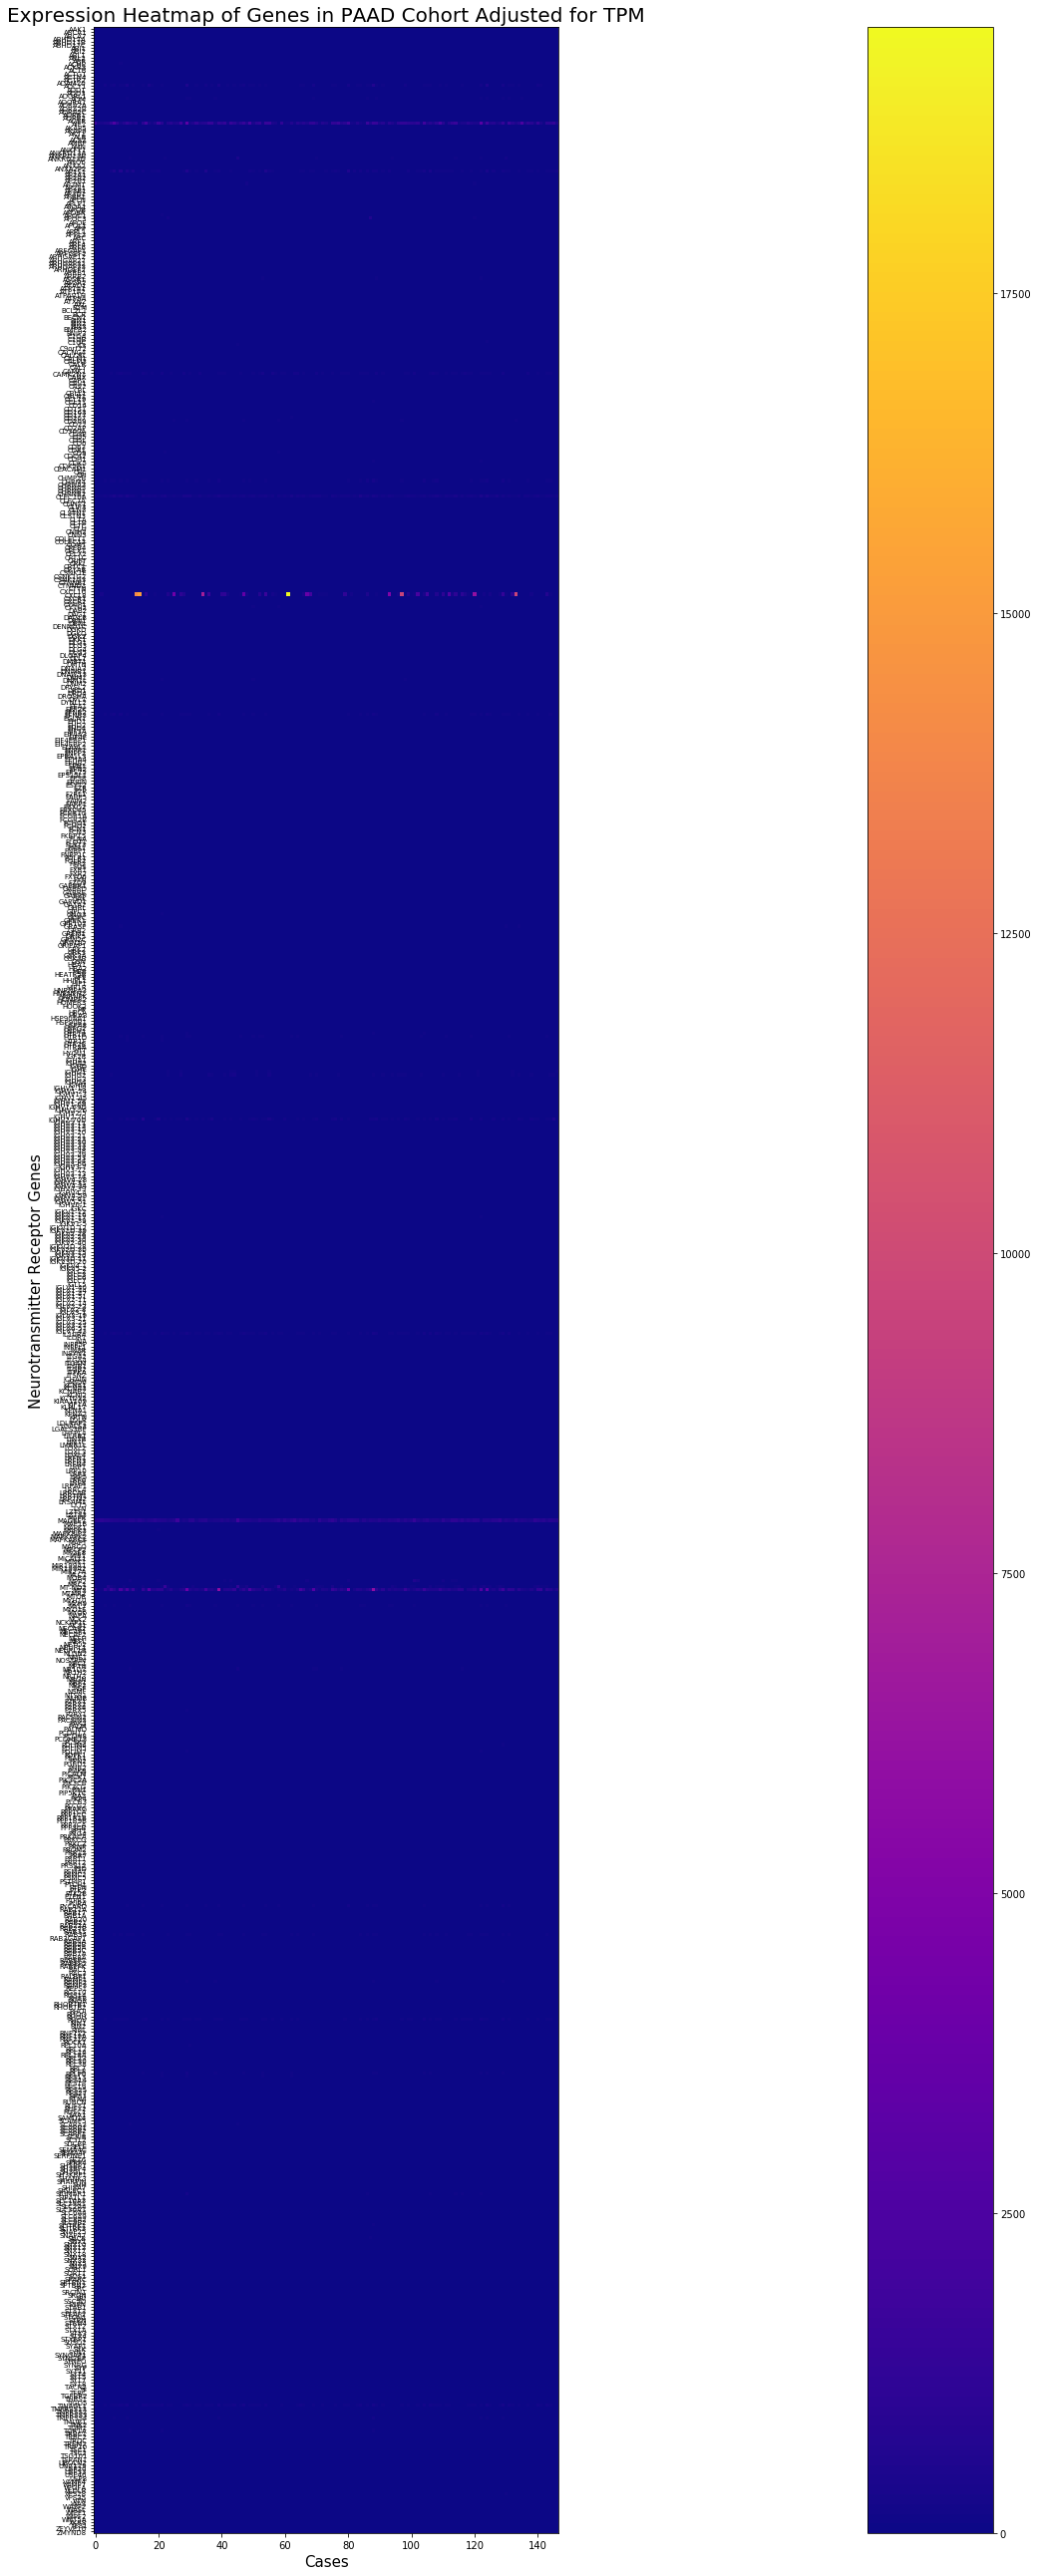

In [12]:
main.draw_expression_heatmap(rnaseq_tpm, rnaseq_tpm['hgnc_symbol'].tolist(), 'plasma', 'Expression Heatmap of Genes in PAAD Cohort Adjusted for TPM', 108, 36)

# Part 3: Expression Heatmaps with Logs

An expression heatmap generated with natural logs:

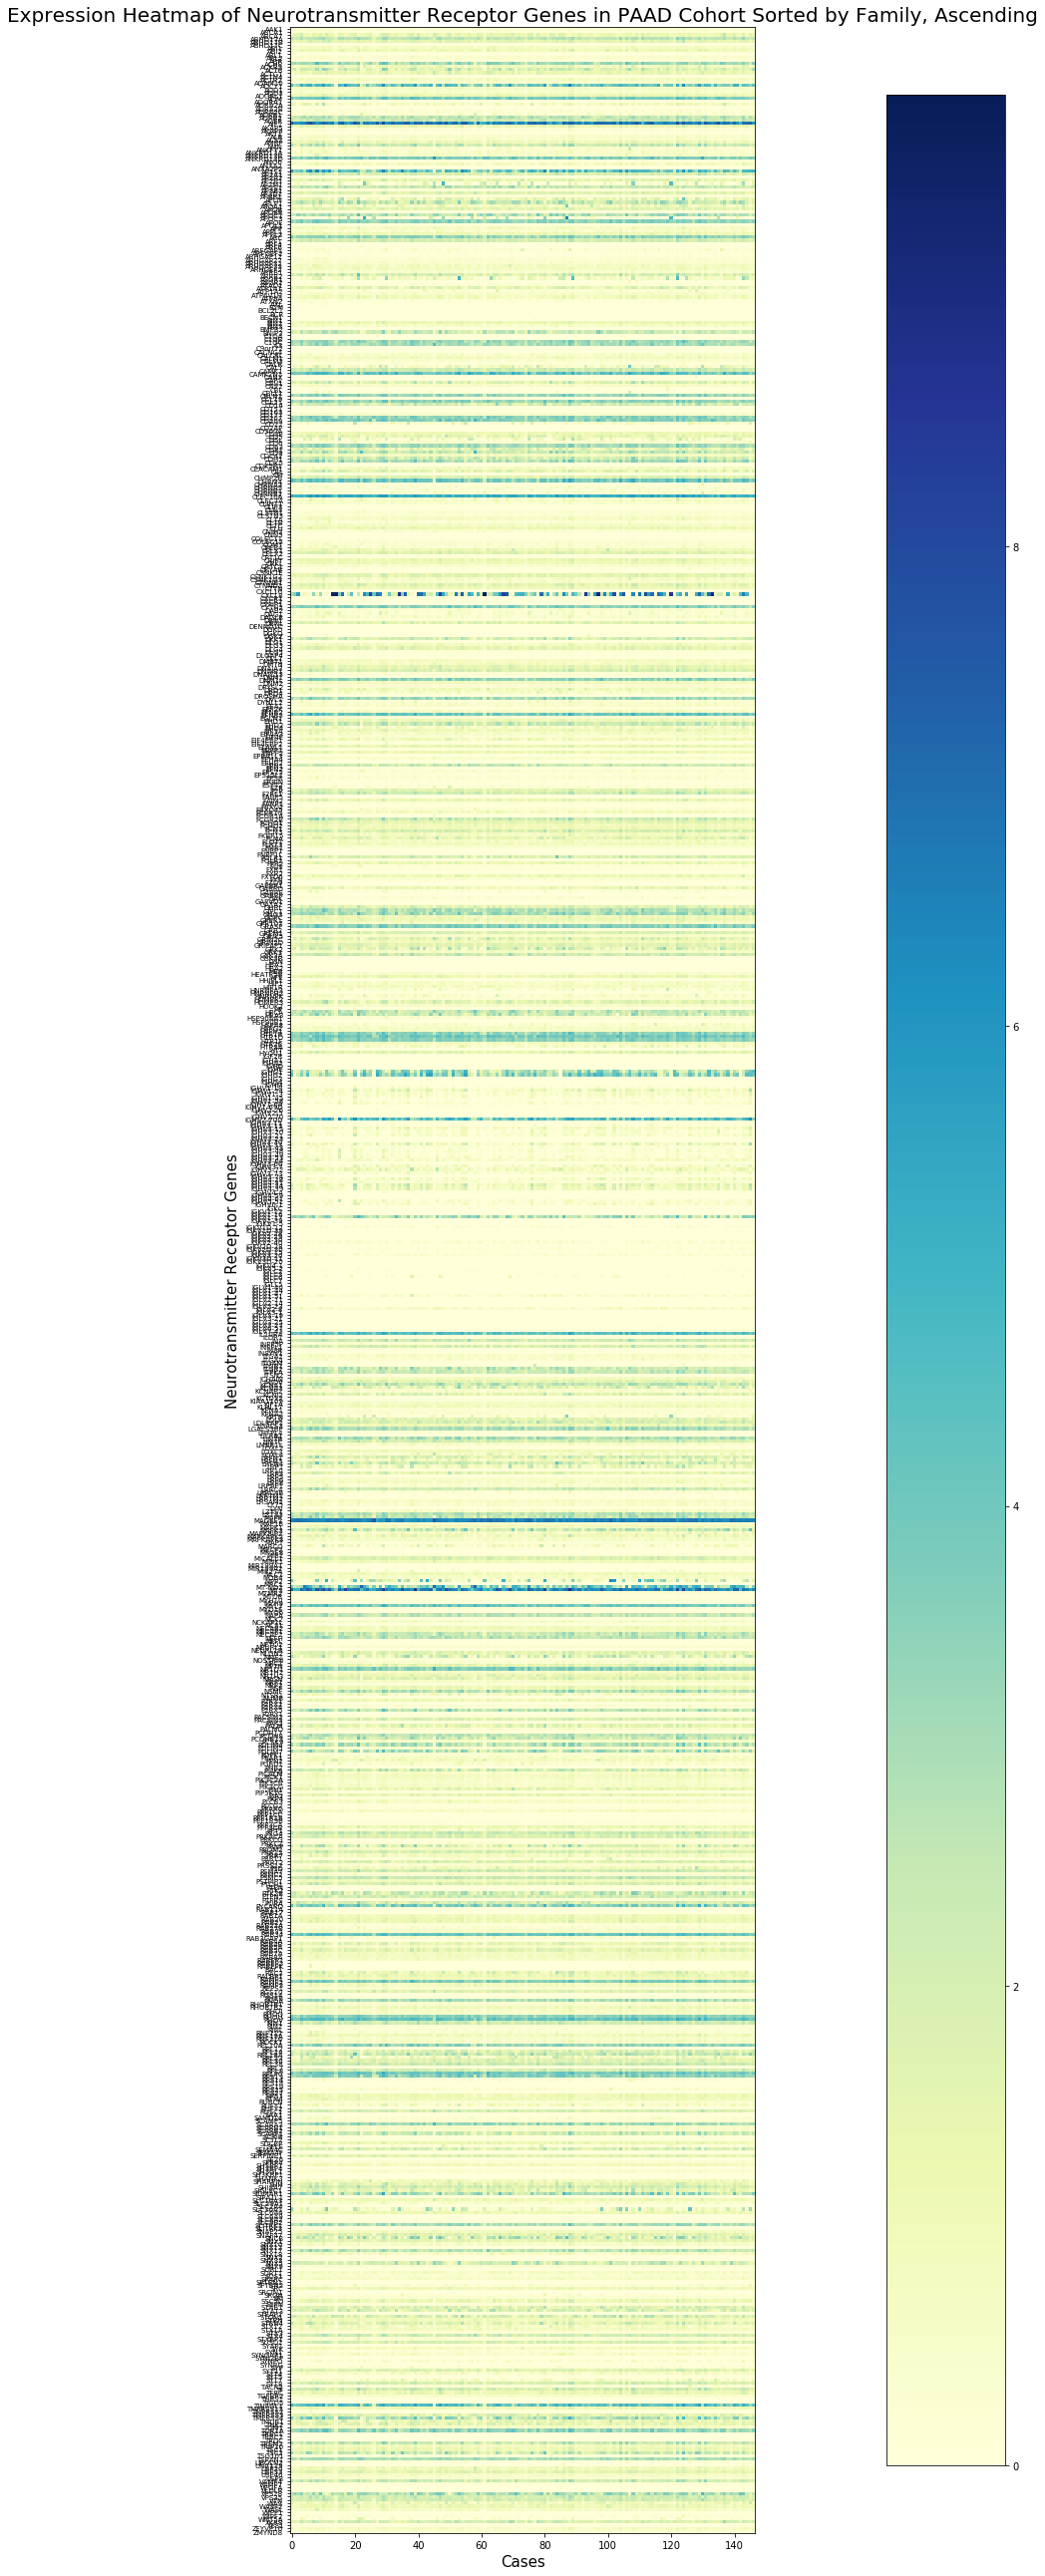

In [13]:
main.draw_expression_log_heatmap(rnaseq_tpm, rnaseq_tpm['hgnc_symbol'].tolist(), 'natural', 'Expression Heatmap of Neurotransmitter Receptor Genes in PAAD Cohort Sorted by Family, Ascending', False, False, 'YlGnBu', 48, 36)

With z-score computed:

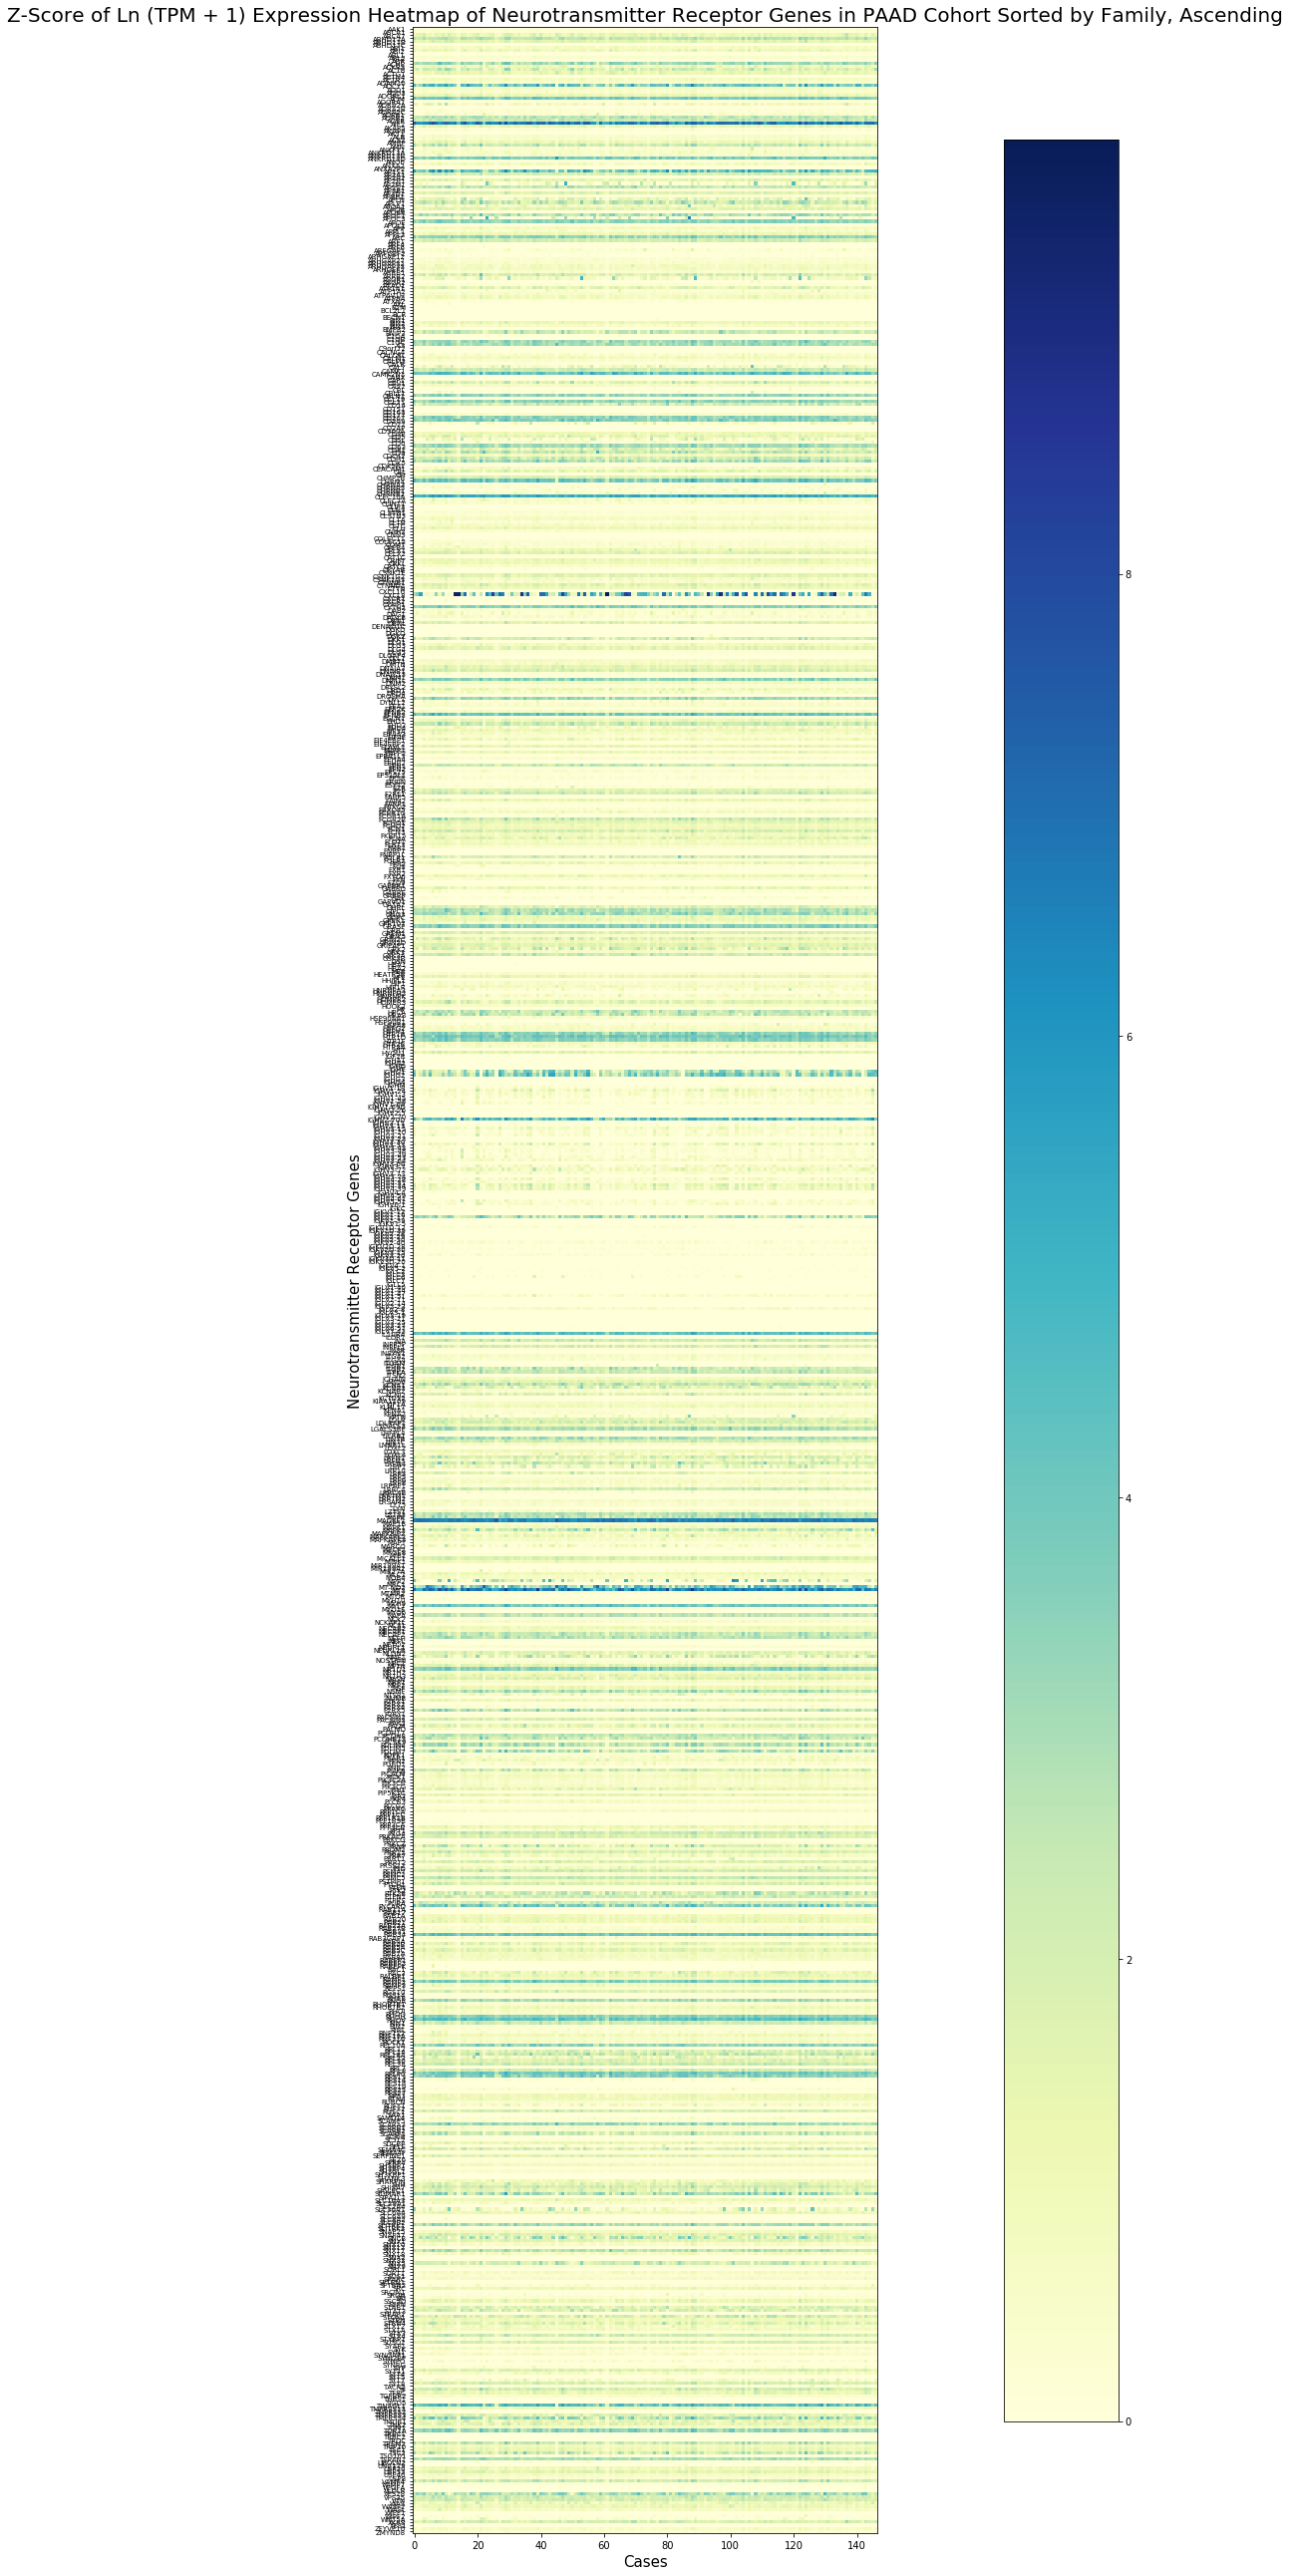

In [14]:
main.draw_expression_log_heatmap(rnaseq_tpm, rnaseq_tpm['hgnc_symbol'].tolist(), 'natural', 'Z-Score of Ln (TPM + 1) Expression Heatmap of Neurotransmitter Receptor Genes in PAAD Cohort Sorted by Family, Ascending', True, False, 'YlGnBu', 48, 36)

# Part 4: Log Fold Change Expression

In [18]:
# taking in a csv file of all of the genes with their calculated tpm values

all_tpm_normal_rnaseq = pd.read_csv('datasets/tpm_normal_rnaseq_values.csv', delimiter=',')

all_tpm_normal_rnaseq.drop('Unnamed: 0', axis=1, inplace=True)

# filtering for the genes of interest
tpm_normal_rnaseq = all_tpm_normal_rnaseq[all_tpm_normal_rnaseq['hgnc_symbol'].isin(gene_list["hgnc_symbol"])]

tpm_normal_rnaseq

hgnc_symbol  X0be94b2f.fccb.4482.b0ea.695c101aa65a.htseq.counts.gz  \
23           AAK1                                           0.164857       
41          ABCA1                                           0.073379       
52          ABCA7                                           0.747694       
116       ABHD17A                                           4.748063       
125       ABHD17B                                           2.797753       
...           ...                                                ...       
36130       WNT5A                                           0.000000       
36200        XKR8                                           1.497051       
36271        YES1                                           0.000766       
36546     ZFYVE16                                           0.221836       
36608      ZMYND8                                           0.143641       

       X1f2aa905.5022.4efe.afac.022d1acfdbe5.htseq.counts.gz  \
23                                              0.333835       
41                                              0.136156       
52                                              1.852644       
116                                            14.652411       
125                                             4.074478       
...                                                  ...       
36130                                           1.242344       
36200                                           4.236256       
36271                                           0.002134       
36546                                           1.102843       
36608                                           0.411978       

       X26a18ff4.ac77.47e8.9ef8.da442ac1325d.htseq.counts.gz  \
23                                              0.240245       
41                                              0.145340       
52                                              4.428415       
116                                            10.171351       
125                                             1.165835       
...                                                  ...       
36130                                           0.289145       
36200                                           4.182257       
36271                                           0.000268       
36546                                           0.530613       
36608                                           0.227980       

       X3de80dcb.4ff2.4125.b8e6.9e06ec1cd833.htseq.counts.gz  \
23                                              0.366106       
41                                              0.338963       
52                                              1.519642       
116                                            13.298478       
125                                             3.828476       
...                                                  ...       
36130                                           0.001167       
36200                                           5.107541       
36271                                           0.001275       
36546                                           1.200949       
36608                                           0.305177       

       X42bec5f7.7623.42e6.bbdf.514fe3805940.htseq.counts.gz  \
23                                              0.290984       
41                                              0.263404       
52                                              1.953332       
116                                            14.715558       
125                                             2.687026       
...                                                  ...       
36130                                           0.021602       
36200                                           4.897518       
36271                                           0.002122       
36546                                           0.967667       
36608                                           0.289628       

       X5047576e.

In [19]:
# taking the average of the normal dataset

tpm_normal_rnaseq_avg = main.average_tpm(tpm_normal_rnaseq)

tpm_normal_rnaseq_avg

hgnc_symbol  Average by gene
23           AAK1         0.391249
41          ABCA1         0.312987
52          ABCA7         2.621252
116       ABHD17A        13.895938
125       ABHD17B         3.755750
...           ...              ...
36130       WNT5A         0.119520
36200        XKR8         6.135299
36271        YES1         0.001718
36546     ZFYVE16         1.021393
36608      ZMYND8         0.341012

[793 rows x 2 columns]

In [20]:
log2fold_rnaseq = main.apply_log2fold(rnaseq_tpm, tpm_normal_rnaseq_avg, rnaseq_tpm.columns.tolist())

log2fold_rnaseq

hgnc_symbol X00faf8ba.ff90.4214.9d03.6c5e14645d8f.htseq.counts.gz  \
0          AAK1                                         -0.0483844      
1         ABCA1                                        -0.00805267      
2         ABCA7                                           0.536672      
3       ABHD17A                                          -0.188109      
4       ABHD17B                                           -0.10089      
..          ...                                                ...      
788       WNT5A                                          -0.132134      
789        XKR8                                           0.499035      
790        YES1                                         0.00120968      
791     ZFYVE16                                          -0.332349      
792      ZMYND8                                          -0.104212      

    X0143419f.2abe.4906.bb55.af6010fab05f.htseq.counts.gz  \
0                                             0.273807      
1                                             0.214004      
2                                            -0.297941      
3                                             0.841926      
4                                             0.675559      
..                                                 ...      
788                                           0.144333      
789                                           0.479662      
790                                         0.00247632      
791                                           0.492272      
792                                          0.0979568      

    X01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz  \
0                                             0.155201      
1                                             0.180881      
2                                            -0.279823      
3                                             0.500922      
4                                             0.459989      
..                                                 ...      
788                                          0.0259939      
789                                           0.785112      
790                                         0.00179495      
791                                           0.589038      
792                                           0.100955      

    X03094067.02d4.40c5.b6fa.bb5180dc7eab.htseq.counts.gz  \
0                                            -0.167497      
1                                            0.0126072      
2                                             -1.04497      
3                                            -0.324911      
4                                           -0.0250427      
..                                                 ...      
788                                           -1.50776      
789                                          -0.835957      
790                                         0.00247632      
791                                          -0.163864      
792                                          -0.161206      

    X0349f526.7816.4a7d.9967.1f75dd9ff00a.htseq.counts.gz  \
0                                             0.127833      
1                                             0.203914      
2                                             0.427585      
3                                             0.735419      
4                                             0.746187      
..                                                 ...      
788                                          -0.653033      
789                                           0.382985      
790                                         0.00152313      
791                                           0.246819      
792                                           0.156035      

    X03630a0c.aa97.4e28.bac9.0206fff669cd.htseq.counts.gz  \
0                                           -0.0154703      
1                                           -0.0825066      
2           

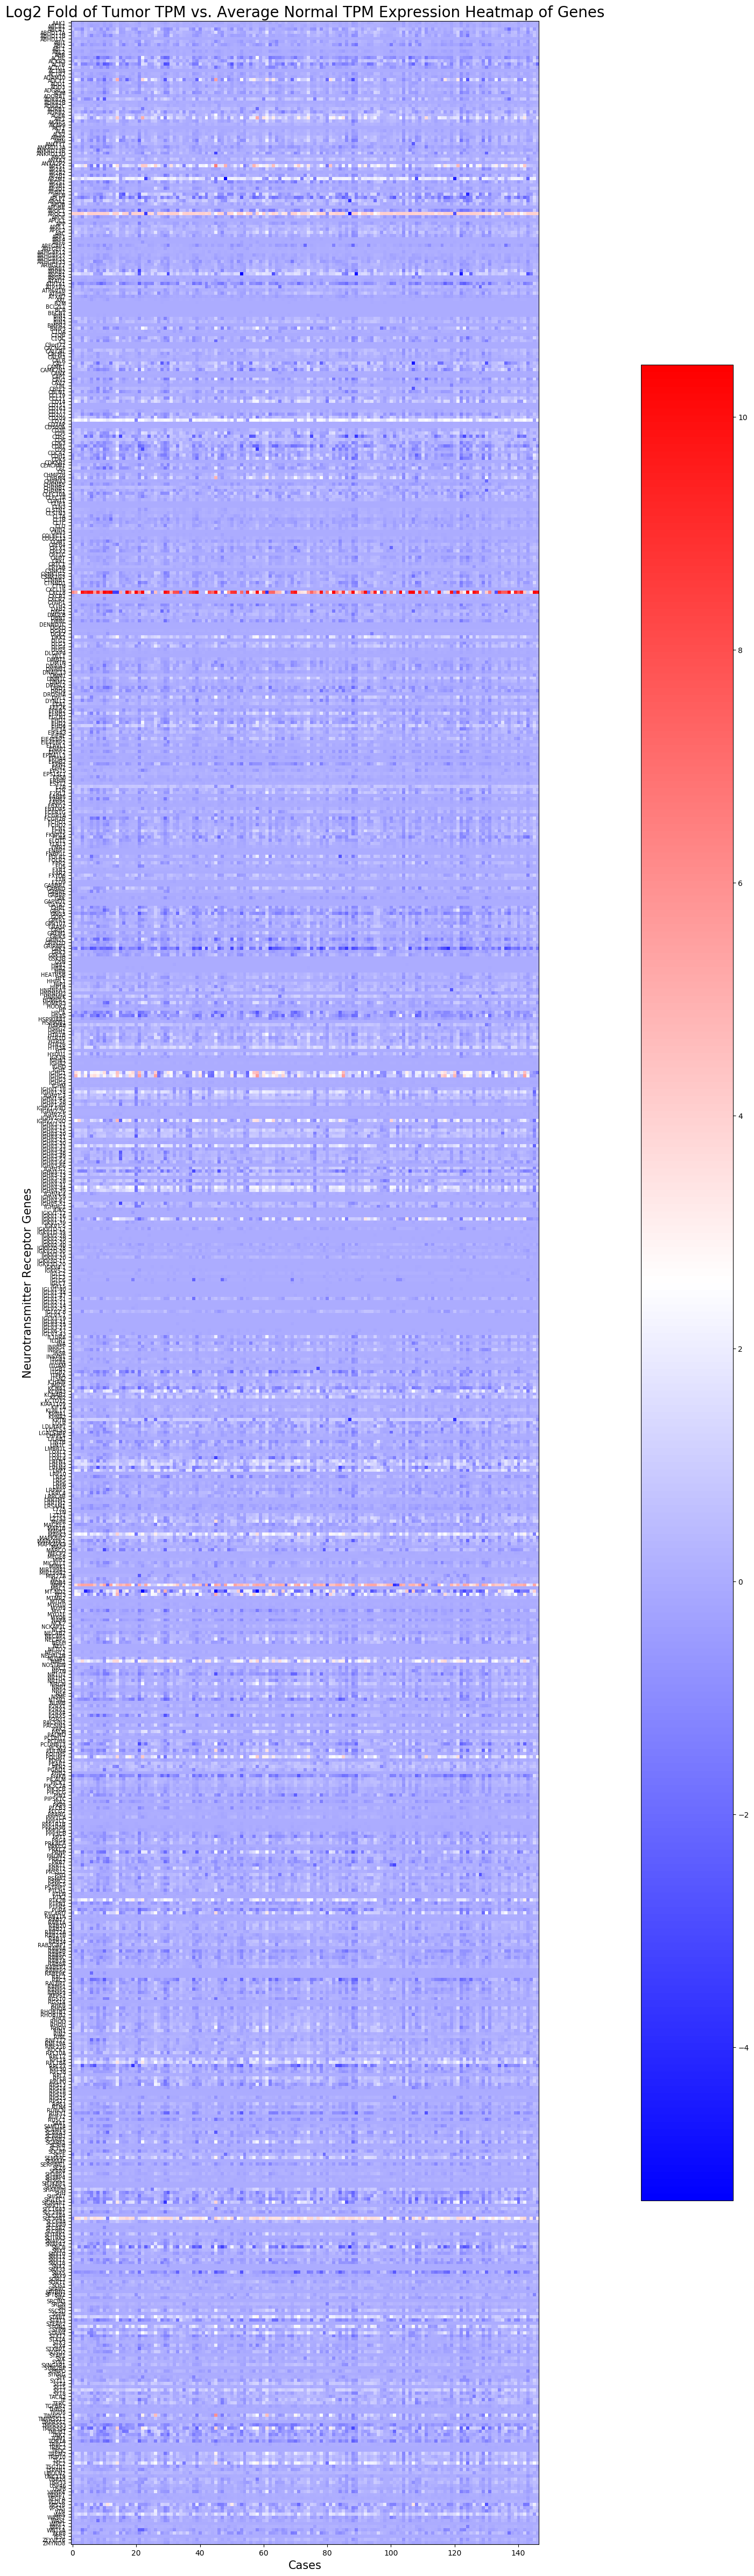

In [28]:
main.draw_expression_heatmap(log2fold_rnaseq, log2fold_rnaseq['hgnc_symbol'].tolist(), 'bwr', 'Log2 Fold of Tumor TPM vs. Average Normal TPM Expression Heatmap of Genes', 48, 48)

In [22]:
rnaseq_tpm_avg = main.average_tpm(rnaseq_tpm)

log2fold_rnaseq_averaged = main.apply_log2fold(rnaseq_tpm_avg, tpm_normal_rnaseq_avg, rnaseq_tpm_avg.columns.tolist())

# log2fold_rnaseq_averaged 

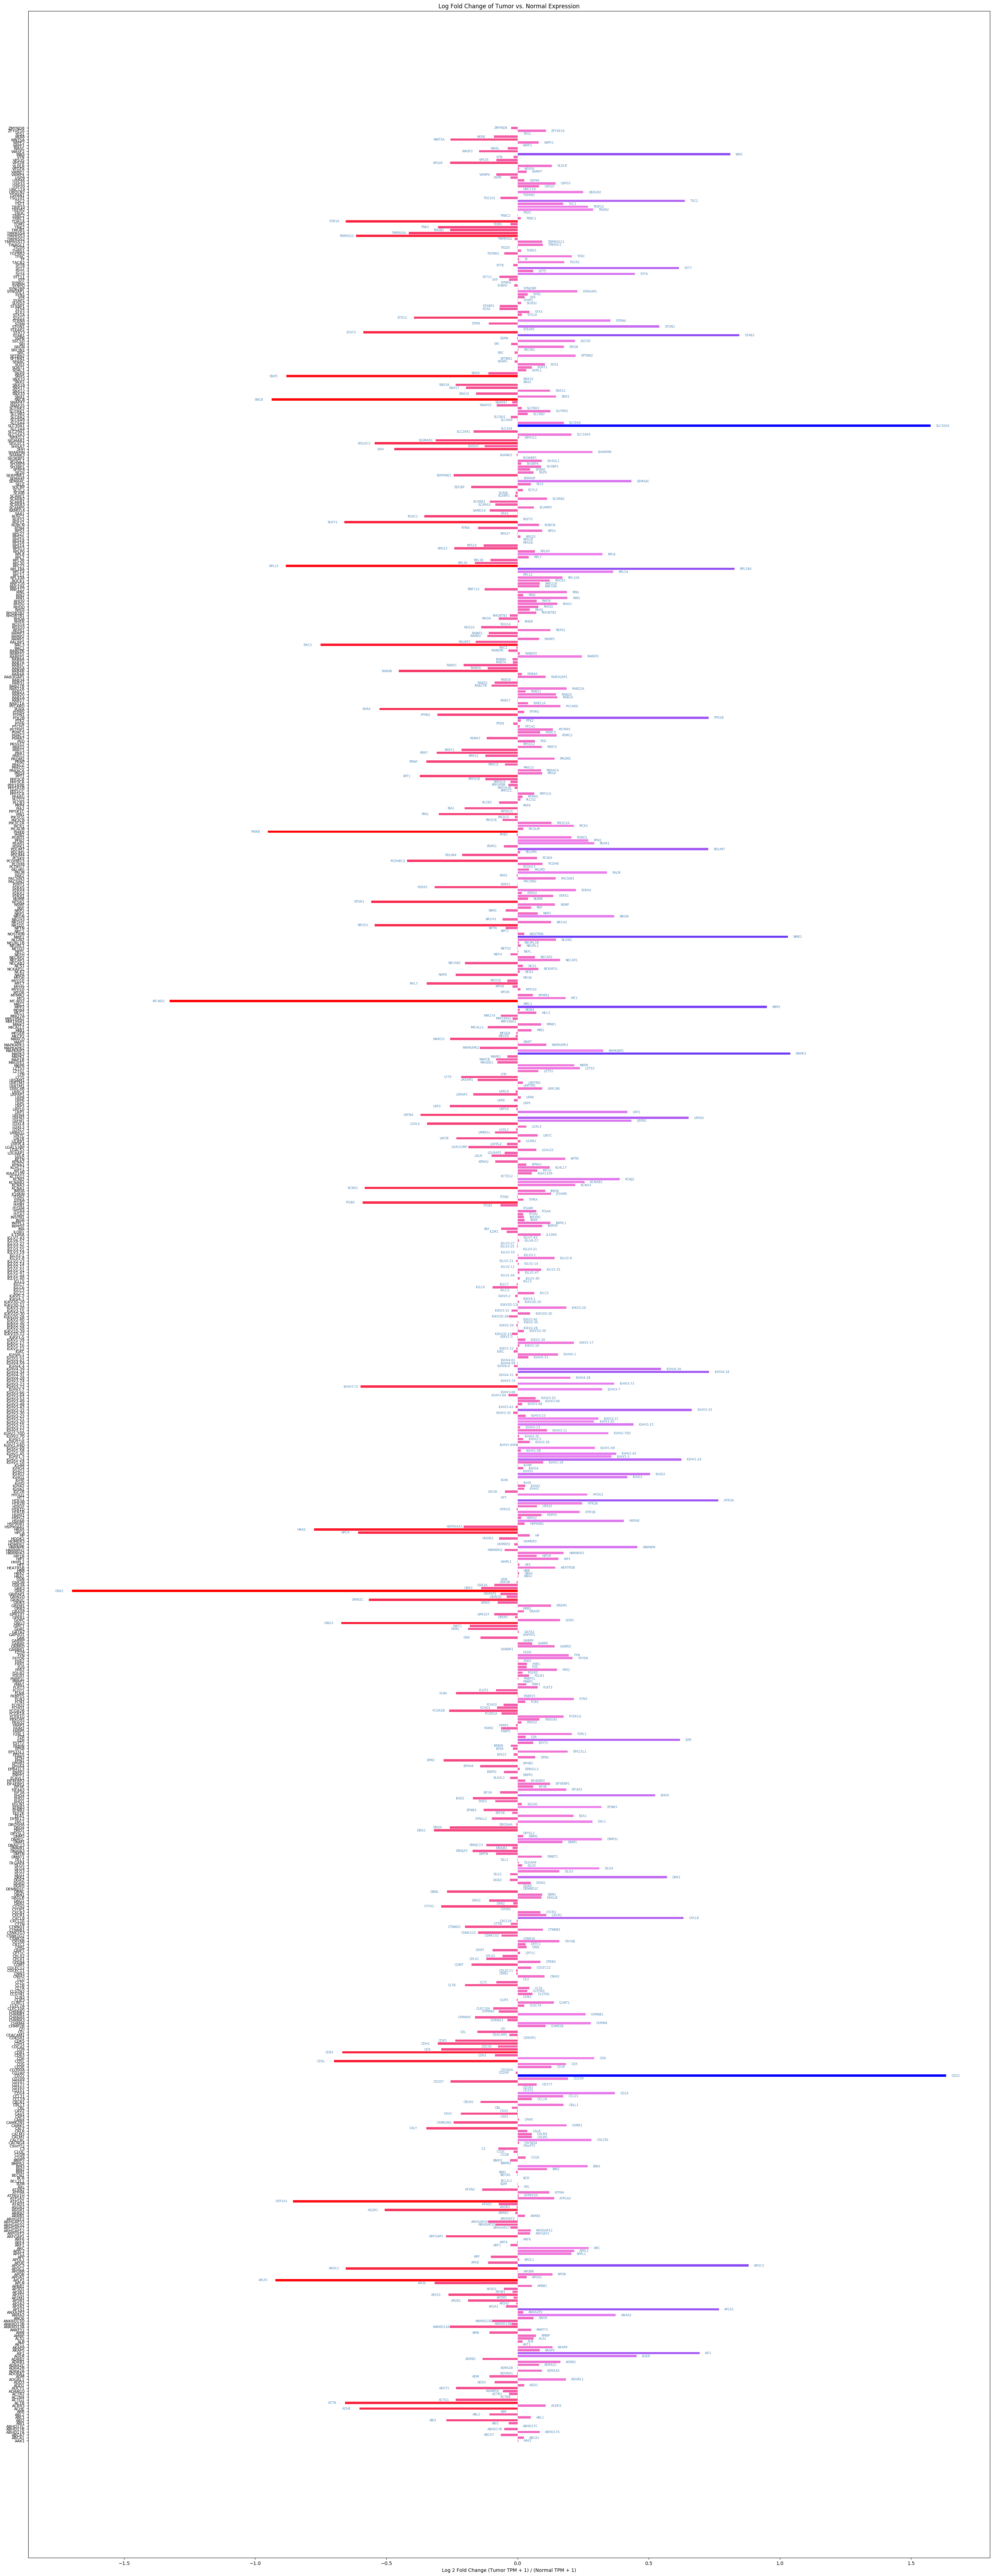

In [30]:
main.draw_horizontal_bar_chart(log2fold_rnaseq_averaged, log2fold_rnaseq_averaged['hgnc_symbol'].tolist(), 36, 96)